In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
refinedet_not_pretrain_root_path = pj(os.getcwd(), "figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512_not_pretrain")
refinedet_freeze_root_path = pj(os.getcwd(), "figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512_freeze")
refinedet_root_path = pj(os.getcwd(), "figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512")
refinedet_all02_root_path = pj(os.getcwd(), "figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512_freeze_All0to2")
refinedet_AugScale_root_path = pj(os.getcwd(), "figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512_freeze_aug_scale")
refinedet_all02_AugScale_root_path = pj(os.getcwd(), "figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512_freeze_All0to2_aug_scale")
refinedet_all02withResize_root_path = pj(os.getcwd(), "figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512_freeze_All0to2withResize")

### AP, Precision, Recall

In [3]:
refinedet_not_pretrain = pd.read_csv(pj(refinedet_not_pretrain_root_path, "class_df.csv"))
refinedet_freeze = pd.read_csv(pj(refinedet_freeze_root_path, "class_df.csv"))
refinedet = pd.read_csv(pj(refinedet_root_path, "class_df.csv"))
refinedet_all02 = pd.read_csv(pj(refinedet_all02_root_path, "class_df.csv"))
refinedet_AugScale = pd.read_csv(pj(refinedet_AugScale_root_path, "class_df.csv"))
refinedet_all02_AugScale = pd.read_csv(pj(refinedet_all02_AugScale_root_path, "class_df.csv"))
refinedet_all02withResize = pd.read_csv(pj(refinedet_all02withResize_root_path, "class_df.csv"))

In [4]:
exp_df = [refinedet_not_pretrain,
          refinedet_freeze,
          refinedet,
          refinedet_all02,
          refinedet_AugScale,
          refinedet_all02_AugScale,
          refinedet_all02withResize,
         ]
exp_name = ["refinedet_not_pretrain",
            "refinedet_freeze",
            "refinedet",
            "refinedet_all02",
            "refinedet_AugScale",
            "refinedet_all02_AugScale",
            "refinedet_all02withResize",
           ]
exp_ap = [float(elem_df["AP"]) for elem_df in exp_df]
exp_precision = [float(elem_df["precision"]) for elem_df in exp_df]
exp_recall = [float(elem_df["recall"]) for elem_df in exp_df]

In [5]:
df = pd.DataFrame({"AP": exp_ap, "precision": exp_precision, "recall": exp_recall})
df.index = exp_name
df

,AP,precision,recall
refinedet_not_pretrain,0.766874,0.633526,0.879615
refinedet_freeze,0.811468,0.634593,0.889246
refinedet,0.690169,0.805217,0.743178
refinedet_all02,0.835126,0.352353,0.961477
refinedet_AugScale,0.826343,0.236635,0.966292
refinedet_all02_AugScale,0.832555,0.447248,0.939005
refinedet_all02withResize,0.628305,0.855072,0.662921


### Error Analysis

### --- size distribution and Average Precision ---

In [6]:
each_size_df = pd.read_csv(pj(refinedet_not_pretrain_root_path, "each_size_df.csv"))
each_size_df["exponent"] = each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(each_size_df["exponent"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"exponent": idx, "count": count})
insect_size_df

,exponent,count
0,7.0,15
1,8.0,181
2,9.0,189
3,10.0,84
4,11.0,50
5,12.0,38
6,13.0,47
7,14.0,16
8,15.0,3


In [7]:
refinedet_not_pretrain = pd.read_csv(pj(refinedet_not_pretrain_root_path, "all_size_df.csv"))
refinedet_freeze = pd.read_csv(pj(refinedet_freeze_root_path, "all_size_df.csv"))
refinedet = pd.read_csv(pj(refinedet_root_path, "all_size_df.csv"))
refinedet_all02 = pd.read_csv(pj(refinedet_all02_root_path, "all_size_df.csv"))
refinedet_AugScale = pd.read_csv(pj(refinedet_AugScale_root_path, "all_size_df.csv"))
refinedet_all02_AugScale = pd.read_csv(pj(refinedet_all02_AugScale_root_path, "all_size_df.csv"))
refinedet_all02withResize = pd.read_csv(pj(refinedet_all02withResize_root_path, "all_size_df.csv"))

In [8]:
exp_df = [refinedet_not_pretrain,
          refinedet_freeze,
          refinedet,
          refinedet_all02,
          refinedet_AugScale,
          refinedet_all02_AugScale,
          refinedet_all02withResize,
         ]

In [9]:
data_dict = {
    "exponent": insect_size_df["exponent"],
    "count": insect_size_df["count"],
}
for name, each_df in zip(exp_name, exp_df):
    data_dict.update({name: each_df["Accuracy"]})

In [10]:
df = pd.DataFrame(data_dict)
df

,exponent,count,refinedet_not_pretrain,refinedet_freeze,refinedet,refinedet_all02,refinedet_AugScale,refinedet_all02_AugScale,refinedet_all02withResize
0,7.0,15,0.866667,0.800000,0.533333,0.800000,0.933333,0.800000,0.466667
1,8.0,181,0.928177,0.922652,0.723757,1.000000,0.988950,0.955801,0.607735
2,9.0,189,0.883598,0.894180,0.719577,0.957672,0.984127,0.936508,0.576720
3,10.0,84,0.797619,0.892857,0.726190,0.952381,0.928571,0.940476,0.761905
4,11.0,50,0.820000,0.880000,0.680000,0.960000,0.980000,0.980000,0.720000
5,12.0,38,0.894737,0.815789,0.815789,0.868421,0.894737,0.842105,0.789474
6,13.0,47,0.851064,0.829787,0.936170,0.957447,0.936170,0.978723,0.851064
7,14.0,16,0.937500,0.937500,0.937500,1.000000,1.000000,0.937500,0.937500
8,15.0,3,1.000000,0.666667,1.000000,1.000000,0.666667,0.666667,0.666667


### (1) Compare Transfer Learning

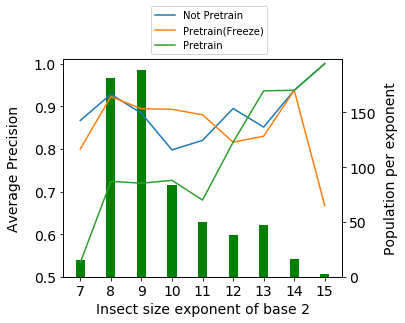

In [11]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7", "8", "9", "10", "11", "12", "13", "14", "15"]

ax1.bar(x_label, df["count"], width=0.3, color="g")
ax2.plot(x_label, df["refinedet_not_pretrain"], label="Not Pretrain")
ax2.plot(x_label, df["refinedet_freeze"], label="Pretrain(Freeze)")
ax2.plot(x_label, df["refinedet"], label="Pretrain")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.75, 1.0), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect size exponent of base 2")
ax1.set_ylabel("Average Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent")
ax2.set_ylim(0.5, 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/detection/compare_method/comp_TL_from_size_dist.png", bbox_inches="tight")

### (2) Compare Augmentation

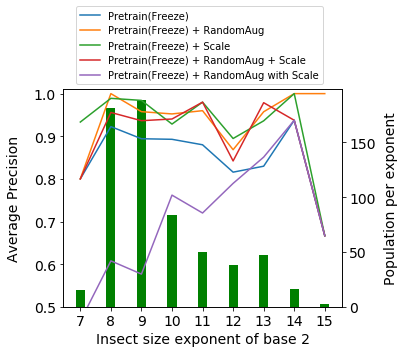

In [12]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7", "8", "9", "10", "11", "12", "13", "14", "15"]

ax1.bar(x_label, df["count"], width=0.3, color="g")
ax2.plot(x_label, df["refinedet_freeze"], label="Pretrain(Freeze)")
ax2.plot(x_label, df["refinedet_all02"], label="Pretrain(Freeze) + RandomAug")
ax2.plot(x_label, df["refinedet_AugScale"], label="Pretrain(Freeze) + Scale")
ax2.plot(x_label, df["refinedet_all02_AugScale"], label="Pretrain(Freeze) + RandomAug + Scale")
ax2.plot(x_label, df["refinedet_all02withResize"], label="Pretrain(Freeze) + RandomAug with Scale")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.95, 1.0), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect size exponent of base 2")
ax1.set_ylabel("Average Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent")
ax2.set_ylim(0.5, 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/detection/compare_method/comp_Aug_from_size_dist.png", bbox_inches="tight")